In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from datasets import ModelNetDataset
from tiny.utils import plot_point_cloud

In [3]:
dataset = ModelNetDataset(root="./data/modelnet10", augment_prob=0.5)

In [4]:
i = 500
dataset[i]

{'mesh': './data/modelnet10/off/bed/train/bed_0364.off',
 'label': 1,
 'prompt': 'bed',
 'low_res': tensor([[ 0.2032,  0.8393,  0.4319],
         [ 0.5039,  0.8393, -0.4496],
         [ 0.2557,  0.5677, -0.4821],
         ...,
         [ 0.3538, -0.2633, -0.2143],
         [ 0.1498,  0.1259, -0.2143],
         [-0.8729, -0.0175, -0.2143]]),
 'high_res': tensor([[ 0.9464,  0.6107,  0.0454],
         [ 0.2614, -0.5502, -0.0938],
         [ 0.5179,  0.5119, -0.2143],
         ...,
         [-0.8795, -0.6786, -0.2204],
         [ 0.1968,  0.8114,  0.4821],
         [-0.2981,  0.7679,  0.2128]])}

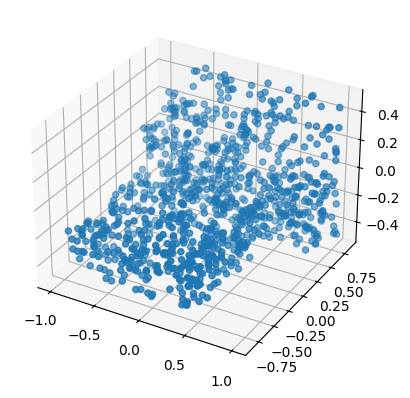

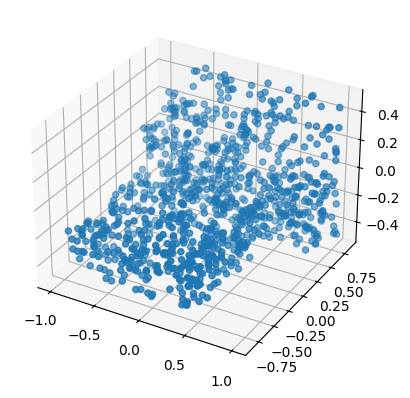

In [6]:
plot_point_cloud(dataset[i]["low_res"])

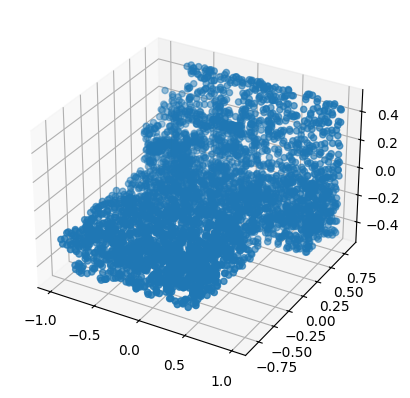

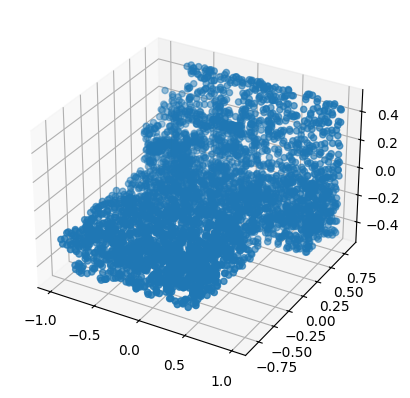

In [7]:
plot_point_cloud(dataset[i]["high_res"])

In [25]:
import open3d as o3d
import numpy as np
import trimesh

In [30]:
data = dataset[i]["high_res"]

In [31]:
import pyvista as pv


In [32]:
cloud = pv.PolyData(data)
volume = cloud.delaunay_3d(alpha=2.)
shell = volume.extract_geometry()

vertices = shell.points
faces = shell.faces.reshape(-1, 4)[:, 1:]  # PyVista stores faces as [n, i, j, k], hence the slicing

trimesh_mesh = trimesh.Trimesh(vertices=vertices, faces=faces)
trimesh_mesh.show()

2024-05-12 19:29:10.136 ( 291.985s) [    14B3D678B740]      vtkDelaunay3D.cxx:513   WARN| vtkDelaunay3D (0x55c0906285f0): 55 degenerate triangles encountered, mesh quality suspect


In [33]:
shell.save('output_shell.ply')